# Implement an Accelerometer
In this notebook you will define your own `get_derivative_from_data` function and use it to differentiate position data ONCE to get velocity information and then again to get acceleration information.

In part 1 I will demonstrate what this process looks like and then in part 2 you'll implement the function yourself.

-----

## Part 1 - Reminder and Demonstration

In [1]:
# run this cell for required imports

from helpers import process_data
from helpers import get_derivative_from_data as solution_derivative
from matplotlib import pyplot as plt

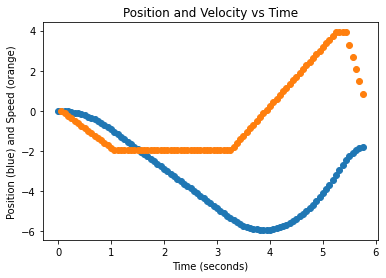

In [2]:
# load the parallel park data
PARALLEL_PARK_DATA = process_data("parallel_park.pickle")

# get the relevant columns
timestamps    = [row[0] for row in PARALLEL_PARK_DATA]
displacements = [row[1] for row in PARALLEL_PARK_DATA]

# calculate first derivative
speeds = solution_derivative(displacements, timestamps)

# plot
plt.title("Position and Velocity vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Position (blue) and Speed (orange)")
plt.scatter(timestamps, displacements)
plt.scatter(timestamps[1:], speeds)
plt.show()

But you just saw that acceleration is the derivative of velocity... which means we can use the same derivative function to calculate acceleration!

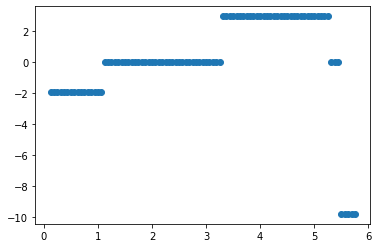

In [3]:
# calculate SECOND derivative 
accelerations = solution_derivative(speeds, timestamps[1:])

# plot (note the slicing of timestamps from 2 --> end)
plt.scatter(timestamps[2:], accelerations)
plt.show()

As you can see, this parallel park motion consisted of four segments with different (but constant) acceleration. We can plot all three quantities at once like this:



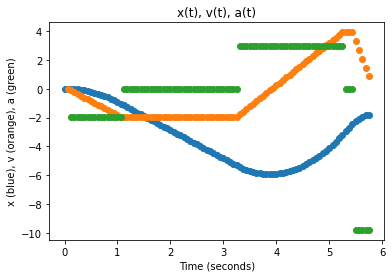

In [4]:
plt.title("x(t), v(t), a(t)")
plt.xlabel("Time (seconds)")
plt.ylabel("x (blue), v (orange), a (green)")
plt.scatter(timestamps, displacements)
plt.scatter(timestamps[1:], speeds)
plt.scatter(timestamps[2:], accelerations)
plt.show()

----

## Part 2 - Implement it yourself!

In [5]:
import numpy as np

def get_derivative_from_data(position_data, time_data):
    # TODO - try your best to implement this code yourself!
    #        if you get really stuck feel free to go back
    #        to the previous notebook for a hint.

    # use the numpy.gradient function
    # to calculate the derivative of the data
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html
    # note that the gradient function returns the derivative

    derivative = np.gradient(position_data, time_data)
    return derivative

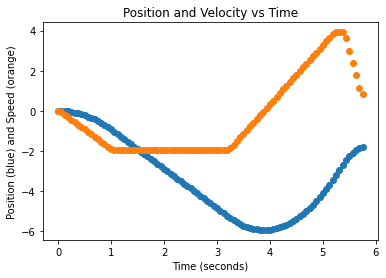

In [7]:
# Testing part 1 - visual testing of first derivative
#   compare this output to the corresponding graph above.
speeds = get_derivative_from_data(displacements, timestamps)

plt.title("Position and Velocity vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Position (blue) and Speed (orange)")
plt.scatter(timestamps, displacements)
# plt.scatter(timestamps[1:], speeds)
plt.scatter(timestamps, speeds)
plt.show()

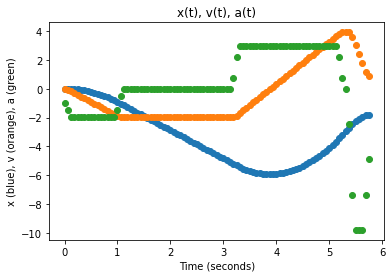

In [9]:
# Testing part 2 - visual testing of second derivative
#   compare this output to the corresponding graph above.
speeds = get_derivative_from_data(displacements, timestamps)
# accelerations = get_derivative_from_data(speeds, timestamps[1:])
accelerations = get_derivative_from_data(speeds, timestamps)

plt.title("x(t), v(t), a(t)")
plt.xlabel("Time (seconds)")
plt.ylabel("x (blue), v (orange), a (green)")
plt.scatter(timestamps, displacements)
# plt.scatter(timestamps[1:], speeds)
plt.scatter(timestamps, speeds)
# plt.scatter(timestamps[2:], accelerations)
plt.scatter(timestamps, accelerations)
plt.show()